# Deep Neural Networks Laboration

### **Quick introduction to Jupiter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Rerunning it deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

In [1]:
# Setups
# Automatically reload modules when changed
%reload_ext autoreload
%autoreload 2

### **Your task**
Your task is to make a DNN that can classify benign or malicious networks attacks using the Mirai dataset (see below). 

**You need to answer all the questions in the notebook.** Also, for all classification tasks that you will explore, you should always answer these two questions:
- How good classification accuracy can a naive classifier obtain? The naive classifier will assume that all examples belong to one class.
- What is random chance classification accuracy if you randomly guess the label of each (test) example? For a balanced dataset and binary classification this is easy (50%), but in many cases it is more complicated and a Monte Carlo simulation may be required to estimate random chance accuracy.

If your classifier cannot perform better than a naive classifier or a random classifier, you are doing something wrong.

If the training is too slow on your own computer, use the smaller datasets (*half or *quarter).

Dense networks are not optimal for tabular datasets like the one used here, but here the main goal is to explore and get a a hands-on experience with deep learning.

# Part 1: The Dataset #

Data used in this laboration are from the [Kitsune Network Attack Datase](https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset). We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

### **1.1 Load the data**
Complete and run the following cell to to load the the `Mirai_data.npy` and the `Mirai_labels.npy` files and remove the first 24 covariances to make the classification task harder.

In [2]:
import os
from numpy import genfromtxt # ! Not needed if you load data from numpy arrays !
import numpy as np

# Load data from numpy arrays, choose reduced files if the training takes too long
# Load the dataset
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Remove the first 24 covariates (columns)
X = X[:, 24:]
# Y = ???

# Print the size of the covariates and labels

# ============================================

### **1.2 Explore the data (NaNs)**
It is common to have NaNs (not a number) in the data, lets check for it.

In [3]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()

# Fist check for NaNs in the data and then in the labels
# ???
# Print the number of NaNs in the covariates
# ???
# ============================================
row_has_nan = np.isnan(X).any(axis=1)

num_rows_with_nan = int(row_has_nan.sum())

print("Total number of X rows that contain at least one NaN", num_rows_with_nan)
print("Total number of label rows that contain at least one NaN", np.isnan(Y).sum())

Total number of X rows that contain at least one NaN 0
Total number of label rows that contain at least one NaN 0


### **1.3 Data preprocessing: normalization**

(This is strictly speaking incorrect methodology, ideally we need to do it after the train/test split to avoid leakage)

In [4]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Convert covariates to floats
X = np.asarray(X, dtype=float)

# Convert labels to integers
Y = np.asarray(Y, dtype=int)

# Remove mean of each covariate (column)
X = X - X.mean(axis=0, keepdims=True)

# Divide each covariate (column) by its standard deviation
X = X / X.std(axis=0, ddof=0, keepdims=True)

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
print("Mean per column:", np.round(X.mean(axis=0), 3))
print("Std per column:",  X.std(axis=0, ddof=0))
# ============================================


Mean per column: [-0. -0.  0.  0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0.  0.  0.  0.
 -0.  0. -0.  0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0.
 -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0.  0.  0.  0.
  0.  0.  0.  0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0. -0. -0. -0.  0. -0. -0.  0. -0. -0.  0.  0.
  0. -0.]
Std per column: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### **1.4 Data split**
Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables:
- `Xtrain` and `Ytrain`  (70% of the dataset)
- `Xtemp` and `Ytemp`  (30% of the dataset)

We use a function from scikit learn (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for more details)

In [5]:
from sklearn.model_selection import train_test_split

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# split the original dataset into 70% Training and 30% Temp
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(
    X, Y,
    test_size=0.30,
    random_state=42,
    stratify=Y  # keeps class proportions similar in both splits
)

# Print the number of examples of each class, for the training data and the remaining 30%
classes_train, counts_train = np.unique(Ytrain, return_counts=True)
classes_temp,  counts_temp  = np.unique(Ytemp,  return_counts=True)

print("Training class counts:", dict(zip(classes_train, counts_train)))
print("Temp (30%) class counts:", dict(zip(classes_temp, counts_temp)))

# ============================================

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

Training class counts: {0: 85135, 1: 449760}
Temp (30%) class counts: {0: 36486, 1: 192756}
Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).


Now split your non-training data (`Xtemp`, `Ytemp`) into 50% validation (`Xval`, `Yval`) and 50% testing (`Xtest`, `Ytest`), we use a function from scikit learn. In total this gives us 70% for training, 15% for validation, 15% for test.

In [6]:
from sklearn.model_selection import train_test_split

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# split the remaining 30% into 50% Validation and 50% Test
Xval, Xtest, Yval, Ytest = train_test_split(
    Xtemp, Ytemp,
    test_size=0.5,
    random_state=42,
    stratify=Ytemp
)

# ============================================

print(f'The validation set has size {Xval.shape[0]}')
print(f'The test set has size {Xtest.shape[0]}')

The validation set has size 114621
The test set has size 114621


In [7]:
print("Expected naive classifier accuracy:", np.round(counts_train[1]/Xtrain.shape[0] * 100, 2))

Expected naive classifier accuracy: 84.08


#### **<span style="color:red">Questions</span>**
1. Do all variables (`Xtrain`,`Ytrain`), (`Xval`,`Yval`), (`Xtest`,`Ytest`) have the shape that you expect?
2. Given the number of examples from each class, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by guessing that all examples belong to one class.

Note, that if your classifier cannot perform better than a naive classifier or a random classifier, you are doing something wrong.


#### **<span style="color:green">Answer</span>**
1. Yes, they do.
2. If we assign 1 as the output label to all datapoints, we can get 84.08% accuracy.

In [8]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 
else:
    print('No GPU available.')

In [9]:
print("TF version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPUs:", tf.config.list_physical_devices("GPU"))
print("Num GPUs:", len(tf.config.list_physical_devices("GPU")))

TF version: 2.10.1
Built with CUDA: True
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


# Part 2: DNN classification
In this next section you will define utilities for building the deep learning networks that will be used later and for visualizing the model training. You will also train several model experimenting with different model architecture configurations and methods for model regularization.

### **2.1 Build DNN model**
Implement the `build_DNN` and `plot_results` functions in the `utilities.py` file. Note that for the changes in the `utilities.py` definitions to be visible by the notebook, you need to save the file. 

Here are some relevant functions that you should use in `build_DNN`. For a complete list of functions and their definitions see the [keras documentation](https://keras.io/api/):

- `model.add()`, adds a layer to the network;
- `Dense()`, a dense network layer. See the [documentation](https://keras.io/api/layers/core_layers/dense/) what are the input options and outputs of the `Dense()` function. 
- `model.compile()`, compiles the model. You can set the input metrics=['accuracy'] to print the classification accuracy during the training.
- cost and loss functions: check the [documentation](https://keras.io/losses/) and chose a loss function for binary classification.

To get more information in model [compile](https://keras.io/api/models/model_training_apis/#compile-method), [training](https://keras.io/api/models/model_training_apis/#fit-method) and [evaluation](https://keras.io/api/models/model_training_apis/#evaluate-method) see the relevant documentation.

After defining the`build_DNN` function use it to create the your first DNN classifier. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

Make sure that the last layer always has a sigmoid activation function (why?).

In [10]:
from utilities import build_DNN, plot_results
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# import a suitable loss function from keras.losses and use as input to the build_DNN function.
try:
    import tf_keras as keras
    USING_TF_KERAS_PKG = True
except ImportError:
    from tensorflow import keras
    USING_TF_KERAS_PKG = False
BinaryCrossentropy = keras.losses.BinaryCrossentropy

# Build a DNN model following the specifications above
model = build_DNN(
    input_shape=(Xtrain.shape[1],),   # number of covariates/features
    n_hidden_layers=2,
    n_hidden_units=20,
    loss=BinaryCrossentropy(),        # from_logits=False matches sigmoid output
    act_fun="sigmoid",
    optimizer="sgd"
)

# ============================================

2026-02-17 17:07:53,477	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.5.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2026-02-17 17:07:53,700	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.5.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


### **2.2 Train DNN model**

Time to train the DNN!
Start simple with 2 hidden layers with 20 nodes each.

Build set the different hyper-parameters, build the model and run the training. Use the following training and hyper-parameters:
- `batch_size=20`
- `epochs=20`
- `learning_rate=0.1`

Make sure that you are using learning rate 0.1 !

### 2 hidden layers with 20 nodes each

In [11]:
# Setup some training and hyper-parameters
batch_size = 10000
epochs = 20

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Specify the learning rate, the input shape and the loss function
learning_rate = 0.1
input_shape = (Xtrain.shape[1],)
loss = BinaryCrossentropy()

# Build the model
model1 = build_DNN(
    input_shape=input_shape,
    n_hidden_layers=2,
    n_hidden_units=20,
    loss=loss,
    act_fun="sigmoid",
    optimizer="sgd",
    learning_rate=learning_rate,
)

# Train the model, provide training data and validation data
history1 = model1.fit(
    Xtrain, Ytrain,
    validation_data=(Xval, Yval),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)
# ============================================

Epoch 1/20
54/54 [==============================] - 3s 10ms/step - loss: 0.4214 - accuracy: 0.8408 - val_loss: 0.3990 - val_accuracy: 0.8408
Epoch 2/20
54/54 [==============================] - 0s 7ms/step - loss: 0.3805 - accuracy: 0.8408 - val_loss: 0.3593 - val_accuracy: 0.8408
Epoch 3/20
54/54 [==============================] - 0s 6ms/step - loss: 0.3363 - accuracy: 0.8408 - val_loss: 0.3115 - val_accuracy: 0.8408
Epoch 4/20
54/54 [==============================] - 0s 6ms/step - loss: 0.2886 - accuracy: 0.8408 - val_loss: 0.2665 - val_accuracy: 0.8408
Epoch 5/20
54/54 [==============================] - 0s 7ms/step - loss: 0.2497 - accuracy: 0.8488 - val_loss: 0.2350 - val_accuracy: 0.8607
Epoch 6/20
54/54 [==============================] - 0s 8ms/step - loss: 0.2249 - accuracy: 0.8750 - val_loss: 0.2164 - val_accuracy: 0.8814
Epoch 7/20
54/54 [==============================] - 0s 8ms/step - loss: 0.2103 - accuracy: 0.8919 - val_loss: 0.2054 - val_accuracy: 0.9008
Epoch 8/20
54/54 [=

In [12]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Evaluate the model on the test data
score = model1.evaluate(Xtest, Ytest, verbose=0)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 0.1738
Test accuracy: 0.9077


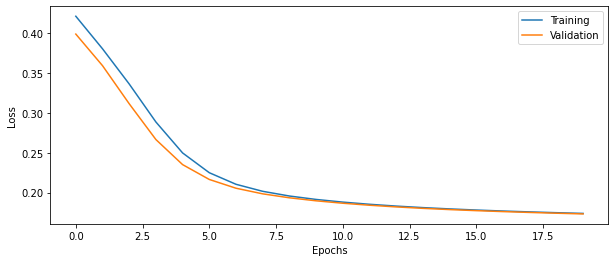

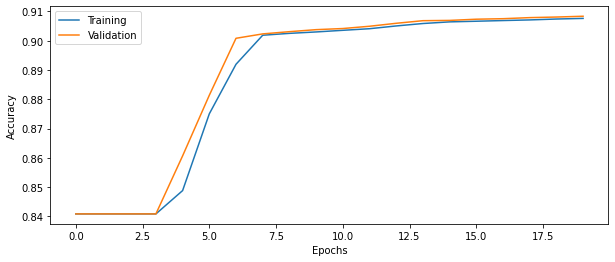

In [13]:
from utilities import plot_results

# Plot the history from the training run
plot_results(history1)

#### **<span style="color:red">Questions</span>**

3. What happens if you add several Dense layers without specifying the activation function?

4. How are the weights in each dense layer initialized as default? How are the bias weights initialized?

#### **<span style="color:green">Answers</span>**
3. If we add several Dense layers without specifying an activation, each layer uses the default “no activation”, i.e. a linear activation a(x)=x.
4. In Keras/TensorFlow, a Dense layer uses Glorot/Xavier uniform as the default initializer for the kernel (the weight matrix), and zeros as the default initializer for the bias vector.


### **2.2 Adressing class imbalance**

This dataset is rather unbalanced with the majority of the samples belonging to class=1. We need to define class weights so that the training pays more attention to the class with fewer samples. We use the [`compute_class_weight`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html) function from `scikit-learn`.

You need to call the function something like this
```python
class_weights = class_weight.compute_class_weight(class_weight = , classes = , y = )
```

otherwise it will through an error.

In [14]:
from sklearn.utils import class_weight

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Calculate class weights
value1, value2 = class_weight.compute_class_weight(class_weight="balanced", classes=np.array([0, 1]), y=Ytrain)

# Print the class weights
print("Class weights:", {0: value1, 1: value2})

# ============================================

# Convert class weights into a dictionary that can be used as input to the model.fit() function

class_weights = {0: value1,
                1: value2}


Class weights: {0: 3.1414518118282726, 1: 0.594644921736037}


### Train a model using class weights. 2 hidden layers with 20 nodes each


In [15]:
# Setup some training and hyper-parameters
batch_size = 10000
epochs = 20

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Specify the learning rate, the input shape and the loss function
learning_rate = 0.1
input_shape = (Xtrain.shape[1],)
loss = BinaryCrossentropy()

# Build the model
model2 = build_DNN(
    input_shape=input_shape,
    n_hidden_layers=2,
    n_hidden_units=20,
    loss=loss,
    act_fun="sigmoid",
    optimizer="sgd",
    learning_rate=learning_rate,
)

# Train the model, provide training data and validation data
history2 = model2.fit(
    Xtrain, Ytrain,
    validation_data=(Xval, Yval),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    class_weight=class_weights
)
# ============================================

Epoch 1/20
54/54 [==============================] - 1s 10ms/step - loss: 0.6323 - accuracy: 0.7420 - val_loss: 0.5717 - val_accuracy: 0.8784
Epoch 2/20
54/54 [==============================] - 0s 7ms/step - loss: 0.4797 - accuracy: 0.8796 - val_loss: 0.4073 - val_accuracy: 0.8789
Epoch 3/20
54/54 [==============================] - 0s 7ms/step - loss: 0.3304 - accuracy: 0.8802 - val_loss: 0.3120 - val_accuracy: 0.8794
Epoch 4/20
54/54 [==============================] - 0s 8ms/step - loss: 0.2599 - accuracy: 0.8804 - val_loss: 0.2819 - val_accuracy: 0.8797
Epoch 5/20
54/54 [==============================] - 0s 8ms/step - loss: 0.2331 - accuracy: 0.8811 - val_loss: 0.2693 - val_accuracy: 0.8813
Epoch 6/20
54/54 [==============================] - 0s 8ms/step - loss: 0.2208 - accuracy: 0.8835 - val_loss: 0.2637 - val_accuracy: 0.8838
Epoch 7/20
54/54 [==============================] - 0s 8ms/step - loss: 0.2135 - accuracy: 0.8861 - val_loss: 0.2569 - val_accuracy: 0.8870
Epoch 8/20
54/54 [=

In [16]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Evaluate model on test data
score = model2.evaluate(Xtest, Ytest, verbose=0)

# ============================================
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 0.2332
Test accuracy: 0.9024


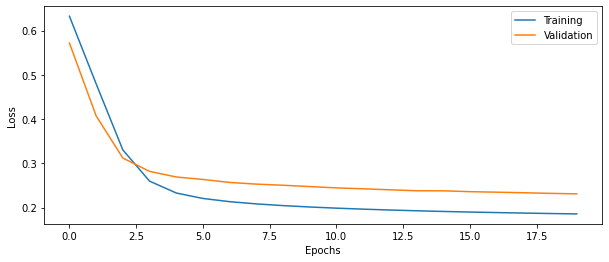

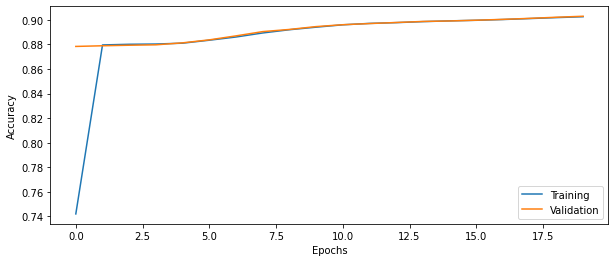

In [17]:
plot_results(history2)

In [18]:
from utilities import eval_precision_recall

print("Unweighted:", eval_precision_recall(model1, Xtest, Ytest, threshold=0.5))
print("Weighted:  ", eval_precision_recall(model2,   Xtest, Ytest, threshold=0.5))

Unweighted: {'threshold': 0.5, 'precision': 0.9775895083719274, 'recall': 0.9111104193903173, 'f1': 0.9431799873255927, 'confusion_matrix': array([[16230,  2013],
       [ 8567, 87811]], dtype=int64)}
Weighted:   {'threshold': 0.5, 'precision': 0.9994489389142924, 'recall': 0.8844653344124178, 'f1': 0.9384481581786556, 'confusion_matrix': array([[18196,    47],
       [11135, 85243]], dtype=int64)}


With class weights, the DNN shifted to predicting class 0 much more often: false positives collapsed, true negatives increased, but we paid for that with more false negatives (lower recall for class 1) and lower overall accuracy. This is the expected precision–recall trade-off when we change the loss weighting.

### **Additional questions**
#### **<span style="color:red">Questions</span>**

5. Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

6. What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 

7. How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  

8. What limits how large the batch size can be?

9.  Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?
10. How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()
   
#### **<span style="color:green">Answers</span>**
5. 1) For large datasets and/or large models, we often can’t fit the whole dataset (and all intermediate activations needed for backprop) in GPU/CPU memory at once, so batching is the only feasible way to train. 2) With full-batch training, weights are updated only once per epoch; with mini-batches updates occur many times per epoch, which often speeds up learning progress in wall-clock time and helps optimization
6. 
Average epoch time (s):
  bs=   100: mean=28.979, std=0.714
  bs=  1000: mean=2.945, std=0.221
  bs= 10000: mean=0.498, std=0.213
The explanation is given in the answer to Q7.
7. In one epoch, the weights are updated once per batch, so with batch size 100 the number of updates per epoch is: N_train/100. Because the updates are 10 times more frequent, it takes 10 times longer on average. But we also get much higher accuracy after one epoch.
8. GPU/CPU memory.
9. Generally, batch size and learning rate trade off because batch size controls how noisy the gradient estimate is: smaller batches give noisier gradients, so the same learning rate is more likely to produce unstable/erratic updates. So if we decrease the batch size, we typically should decrease the learning rate to keep training stable. 
10. Extra parameters in the 4×50 network vs the 2×20 network: (50d+7751)−(20d+461)=30d+7290 where d is the number of features. This is calculated using the formula: (input_dim+1)×units (weights plus one bias per unit) for each layer. So in the first layer the input_dim will be the number of features and for each subsequent layer it's the number of nodes in the previous layer. 

In [19]:
# Code for answering Q6
import time

class TimeHistory(keras.callbacks.Callback):
    """Record wall-clock time per epoch."""
    def on_train_begin(self, logs=None):
        self.times = []

    def on_epoch_begin(self, epoch, logs=None):
        self._start = time.time()

    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self._start)  # seconds


def train_and_time(batch_size, epochs=3):
    model = build_DNN(
        input_shape=(Xtrain.shape[1],),
        n_hidden_layers=2,
        n_hidden_units=20,
        loss=keras.losses.BinaryCrossentropy(),
        act_fun="sigmoid",
        optimizer="sgd",
        learning_rate=0.1,
    )

    cb = TimeHistory()
    history = model.fit(
        Xtrain, Ytrain,
        validation_data=(Xval, Yval),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1,
        callbacks=[cb],
    )
    return cb.times, history


batch_sizes = [100, 1_000, 10_000]
epochs_to_time = 5

results = {}
for bs in batch_sizes:
    times, _ = train_and_time(bs, epochs=epochs_to_time)
    results[bs] = times
    print(f"Batch size {bs}: epoch times (s) = {[round(t, 3) for t in times]}")

print("\nAverage epoch time (s):")
for bs in batch_sizes:
    print(f"  bs={bs:>6}: mean={np.mean(results[bs]):.3f}, std={np.std(results[bs]):.3f}")

Epoch 1/5
5349/5349 [==============================] - 27s 5ms/step - loss: 0.1725 - accuracy: 0.9092 - val_loss: 0.1547 - val_accuracy: 0.9177
Epoch 2/5
5349/5349 [==============================] - 28s 5ms/step - loss: 0.1521 - accuracy: 0.9180 - val_loss: 0.1488 - val_accuracy: 0.9193
Epoch 3/5
5349/5349 [==============================] - 28s 5ms/step - loss: 0.1475 - accuracy: 0.9196 - val_loss: 0.1450 - val_accuracy: 0.9210
Epoch 4/5
5349/5349 [==============================] - 28s 5ms/step - loss: 0.1441 - accuracy: 0.9219 - val_loss: 0.1419 - val_accuracy: 0.9243
Epoch 5/5
5349/5349 [==============================] - 28s 5ms/step - loss: 0.1411 - accuracy: 0.9241 - val_loss: 0.1392 - val_accuracy: 0.9246
Batch size 100: epoch times (s) = [26.867, 28.006, 28.105, 28.1, 28.084]
Epoch 1/5
535/535 [==============================] - 3s 4ms/step - loss: 0.2579 - accuracy: 0.8738 - val_loss: 0.1858 - val_accuracy: 0.9062
Epoch 2/5
535/535 [==============================] - 3s 6ms/step -

In [20]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                1860      
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________


### **2.3 Model regularization**

In the following sections you will explore methods for model normalization, namely `BatchNormalization` and `Dropout`, and also look at the impact of ofter activation functions and optimization algorithms.
#### **2.3.1 Batch normalization**

Now add batch normalization after each hidden dense layer in `build_DNN`.

See the [documentation](https://keras.io/layers/normalization/) for information about how to call the function.

#### **<span style="color:red">Questions</span>**
11. Why is batch normalization important when training deep networks?

#### **<span style="color:green">Answers</span>**
11. Batch normalization (BN) is important because it stabilizes and speeds up training of deep networks by keeping the distribution of activations in a well-behaved range as parameters change during learning. By normalizing layer inputs (per mini-batch) and then learning a scale/shift, BN reduces large swings in activation magnitudes, which makes gradients better behaved.

### 2 hidden layers, 20 nodes each, class weights and batch normalization

Epoch 1/20
54/54 [==============================] - 1s 16ms/step - loss: 0.4147 - accuracy: 0.8842 - val_loss: 0.3895 - val_accuracy: 0.8443
Epoch 2/20
54/54 [==============================] - 1s 12ms/step - loss: 0.2634 - accuracy: 0.8915 - val_loss: 0.2968 - val_accuracy: 0.8550
Epoch 3/20
54/54 [==============================] - 1s 10ms/step - loss: 0.2259 - accuracy: 0.8972 - val_loss: 0.2473 - val_accuracy: 0.8788
Epoch 4/20
54/54 [==============================] - 0s 9ms/step - loss: 0.2089 - accuracy: 0.9024 - val_loss: 0.2160 - val_accuracy: 0.9079
Epoch 5/20
54/54 [==============================] - 0s 9ms/step - loss: 0.1997 - accuracy: 0.9059 - val_loss: 0.1997 - val_accuracy: 0.9132
Epoch 6/20
54/54 [==============================] - 0s 9ms/step - loss: 0.1940 - accuracy: 0.9077 - val_loss: 0.1953 - val_accuracy: 0.9127
Epoch 7/20
54/54 [==============================] - 1s 10ms/step - loss: 0.1902 - accuracy: 0.9088 - val_loss: 0.1986 - val_accuracy: 0.9127
Epoch 8/20
54/54

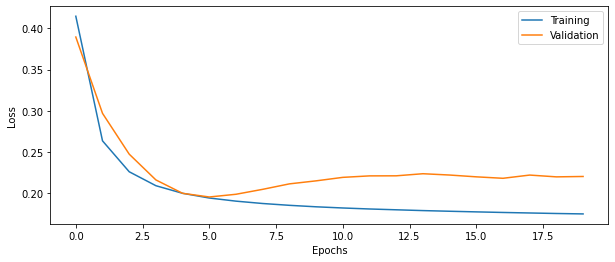

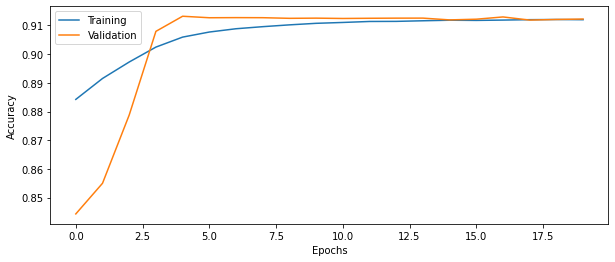

In [21]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
learning_rate = 0.1
input_shape = (Xtrain.shape[1],)
loss = BinaryCrossentropy()

# Build the model
model6 = build_DNN(
    input_shape=input_shape,
    n_hidden_layers=2,
    n_hidden_units=20,
    loss=loss,
    act_fun="sigmoid",
    optimizer="sgd",
    learning_rate=learning_rate,
    use_bn=True
)

# Train the model, provide training data and validation data
history6 = model6.fit(
    Xtrain, Ytrain,
    validation_data=(Xval, Yval),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    class_weight=class_weights
)

# Evaluate model on test data
score = model6.evaluate(Xtest, Ytest, verbose=0)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history6)

#### **2.3.2 Activation function**

Try changing the activation function in each layer from sigmoid to [ReLU](https://keras.io/api/layers/activations/).

**Note**: the last layer should still have a sigmoid activation function.

### 2 hidden layers, 20 nodes each, class weights, ReLU and no batch normalization

Epoch 1/20
54/54 [==============================] - 1s 10ms/step - loss: 0.3224 - accuracy: 0.8591 - val_loss: 0.2772 - val_accuracy: 0.8895
Epoch 2/20
54/54 [==============================] - 0s 7ms/step - loss: 0.2059 - accuracy: 0.8934 - val_loss: 0.2467 - val_accuracy: 0.8971
Epoch 3/20
54/54 [==============================] - 0s 6ms/step - loss: 0.1912 - accuracy: 0.9003 - val_loss: 0.2395 - val_accuracy: 0.9029
Epoch 4/20
54/54 [==============================] - 0s 8ms/step - loss: 0.1842 - accuracy: 0.9058 - val_loss: 0.2330 - val_accuracy: 0.9075
Epoch 5/20
54/54 [==============================] - 0s 8ms/step - loss: 0.1798 - accuracy: 0.9086 - val_loss: 0.2259 - val_accuracy: 0.9096
Epoch 6/20
54/54 [==============================] - 0s 8ms/step - loss: 0.1765 - accuracy: 0.9103 - val_loss: 0.2208 - val_accuracy: 0.9112
Epoch 7/20
54/54 [==============================] - 0s 8ms/step - loss: 0.1741 - accuracy: 0.9121 - val_loss: 0.2213 - val_accuracy: 0.9139
Epoch 8/20
54/54 [=

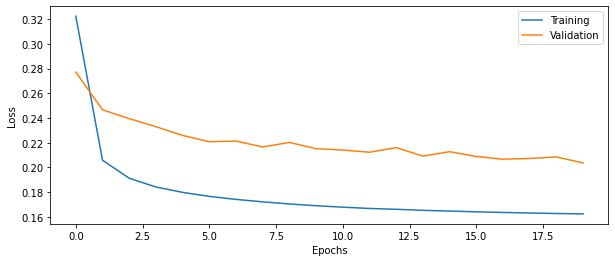

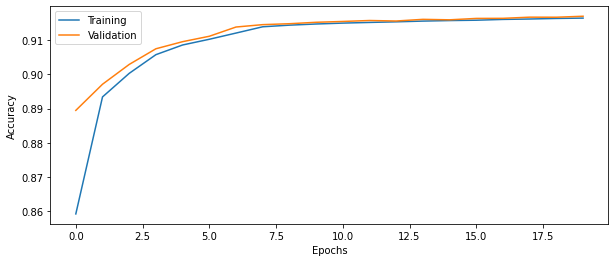

In [22]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
model7 = build_DNN(
    input_shape=input_shape,
    n_hidden_layers=2,
    n_hidden_units=20,
    loss=loss,
    act_fun="relu",
    optimizer="sgd",
    learning_rate=learning_rate,
    use_bn=False
)

history7 = model7.fit(
    Xtrain, Ytrain,
    validation_data=(Xval, Yval),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    class_weight=class_weights
)

# Evaluate model on test data
score = model7.evaluate(Xtest, Ytest, verbose=0)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history7)

#### **2.3.3 Optimizer**

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from [keras.optimizers](https://keras.io/optimizers/). 

### 2 hidden layers, 20 nodes each, class weights, Adam optimizer, no batch normalization, sigmoid activations

Epoch 1/20
54/54 [==============================] - 1s 10ms/step - loss: 0.2343 - accuracy: 0.8740 - val_loss: 0.2162 - val_accuracy: 0.9103
Epoch 2/20
54/54 [==============================] - 0s 7ms/step - loss: 0.1685 - accuracy: 0.9146 - val_loss: 0.2099 - val_accuracy: 0.9182
Epoch 3/20
54/54 [==============================] - 0s 7ms/step - loss: 0.1614 - accuracy: 0.9182 - val_loss: 0.2138 - val_accuracy: 0.9191
Epoch 4/20
54/54 [==============================] - 0s 8ms/step - loss: 0.1582 - accuracy: 0.9194 - val_loss: 0.1989 - val_accuracy: 0.9203
Epoch 5/20
54/54 [==============================] - 0s 8ms/step - loss: 0.1557 - accuracy: 0.9199 - val_loss: 0.2045 - val_accuracy: 0.9204
Epoch 6/20
54/54 [==============================] - 0s 8ms/step - loss: 0.1542 - accuracy: 0.9202 - val_loss: 0.1928 - val_accuracy: 0.9206
Epoch 7/20
54/54 [==============================] - 0s 8ms/step - loss: 0.1534 - accuracy: 0.9203 - val_loss: 0.1844 - val_accuracy: 0.9204
Epoch 8/20
54/54 [=

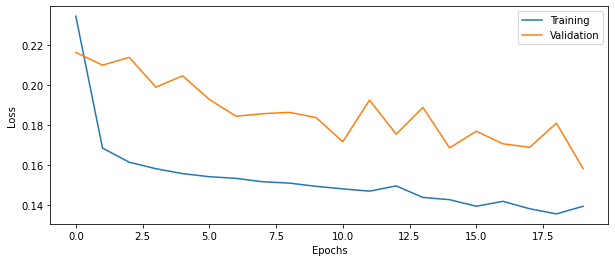

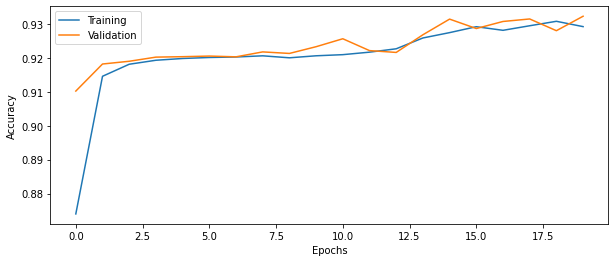

In [23]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
model8 = build_DNN(
    input_shape=input_shape,
    n_hidden_layers=2,
    n_hidden_units=20,
    loss=loss,
    act_fun="sigmoid",
    optimizer="adam",
    learning_rate=learning_rate,
    use_bn=False
)

history8 = model8.fit(
    Xtrain, Ytrain,
    validation_data=(Xval, Yval),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    class_weight=class_weights
)

# Evaluate model on test data
score = model8.evaluate(Xtest, Ytest, verbose=0)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history8)

#### 2.3.4 **Dropout regularization**

Dropout is a type of regularization that can improve accuracy for validation and test data. It randomly removes connections to force the neural network to not rely too much on a small number of weights.

Add a Dropout layer after each Dense layer (but not after the final dense layer) in `build_DNN`, with a dropout probability of 50%. Look at the [documentation](https://keras.io/api/layers/regularization_layers/dropout/) for more information on how to call set this layer.

#### **<span style="color:red">Questions</span>**
12. How does the validation accuracy change when adding dropout?
13. How does the test accuracy change when adding dropout?

#### **<span style="color:green">Answers</span>**
12. Adding dropout usually makes training accuracy go down, and validation accuracy often goes up if we were overfitting—but it can also stay flat or drop if we add too much dropout or the model was already underfitting
13. If the no-dropout model is overfitting, dropout often improves test accuracy by improving generalization. If dropout is too strong (rate too high) or the model/data is already capacity-limited, it can hurt test accuracy because the network can’t fit the signal well.

### 2 hidden layers with 20 nodes each, class weights, dropout, SGD optimizer, no batch normalization and sigmoid activations

Epoch 1/20
54/54 [==============================] - 1s 10ms/step - loss: 0.6871 - accuracy: 0.5210 - val_loss: 0.5724 - val_accuracy: 0.8814
Epoch 2/20
54/54 [==============================] - 0s 8ms/step - loss: 0.5774 - accuracy: 0.6938 - val_loss: 0.4688 - val_accuracy: 0.8810
Epoch 3/20
54/54 [==============================] - 0s 7ms/step - loss: 0.4965 - accuracy: 0.7629 - val_loss: 0.3807 - val_accuracy: 0.8815
Epoch 4/20
54/54 [==============================] - 0s 9ms/step - loss: 0.4345 - accuracy: 0.8039 - val_loss: 0.3303 - val_accuracy: 0.8793
Epoch 5/20
54/54 [==============================] - 0s 8ms/step - loss: 0.3912 - accuracy: 0.8278 - val_loss: 0.3028 - val_accuracy: 0.8793
Epoch 6/20
54/54 [==============================] - 0s 7ms/step - loss: 0.3655 - accuracy: 0.8414 - val_loss: 0.2900 - val_accuracy: 0.8794
Epoch 7/20
54/54 [==============================] - 0s 7ms/step - loss: 0.3443 - accuracy: 0.8511 - val_loss: 0.2836 - val_accuracy: 0.8797
Epoch 8/20
54/54 [=

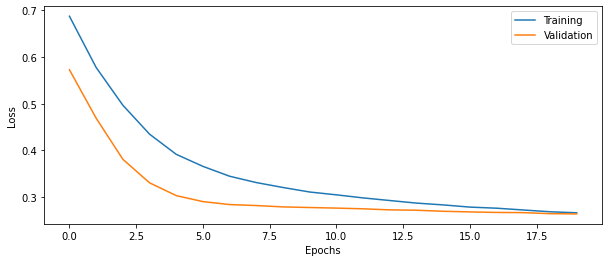

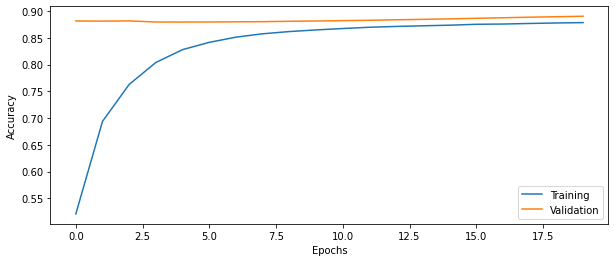

In [24]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Build and train model
model9 = build_DNN(
    input_shape=input_shape,
    n_hidden_layers=2,
    n_hidden_units=20,
    loss=loss,
    act_fun="sigmoid",
    optimizer="sgd",
    learning_rate=learning_rate,
    use_bn=False,
    use_dropout=True, 
    dropout_rate=0.5
)

history9 = model9.fit(
    Xtrain, Ytrain,
    validation_data=(Xval, Yval),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    class_weight=class_weights
)

# Evaluate model on test data
score = model9.evaluate(Xtest, Ytest, verbose=0)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history9)

# Part 3:  Hyper parameter tuning

### **3.1 Manual hyper parameter tuning**
Spend some time (20 to 30 minutes) tuning the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

#### **<span style="color:red">Question</span>**
14. How high classification accuracy can you achieve for the test data? What is your best configuration?
   
#### **<span style="color:green">Answers</span>**
So far we have had the best results with the Adam optimizer and the ReLU activation function, so it seems reasonable to try a combination of the two and perhaps train for longer than 20 epochs as the accuracy curve does not seem to quite flatten out in some cases. These seem to be indeed good ideas as we achieve our best accuracy ever even without increasing the number of layers (93.54%). See the answer regarding the increased number of layers further below.

Epoch 1/60
54/54 [==============================] - 1s 12ms/step - loss: 0.2617 - accuracy: 0.8643 - val_loss: 0.2263 - val_accuracy: 0.9062
Epoch 2/60
54/54 [==============================] - 0s 8ms/step - loss: 0.1780 - accuracy: 0.9096 - val_loss: 0.1954 - val_accuracy: 0.9151
Epoch 3/60
54/54 [==============================] - 1s 10ms/step - loss: 0.1708 - accuracy: 0.9144 - val_loss: 0.1961 - val_accuracy: 0.9156
Epoch 4/60
54/54 [==============================] - 1s 10ms/step - loss: 0.1670 - accuracy: 0.9150 - val_loss: 0.1960 - val_accuracy: 0.9169
Epoch 5/60
54/54 [==============================] - 1s 10ms/step - loss: 0.1654 - accuracy: 0.9162 - val_loss: 0.1921 - val_accuracy: 0.9183
Epoch 6/60
54/54 [==============================] - 1s 10ms/step - loss: 0.1603 - accuracy: 0.9172 - val_loss: 0.1842 - val_accuracy: 0.9184
Epoch 7/60
54/54 [==============================] - 1s 10ms/step - loss: 0.1591 - accuracy: 0.9176 - val_loss: 0.1842 - val_accuracy: 0.9189
Epoch 8/60
54/

Epoch 59/60
54/54 [==============================] - 1s 10ms/step - loss: 0.1355 - accuracy: 0.9329 - val_loss: 0.1473 - val_accuracy: 0.9362
Epoch 60/60
54/54 [==============================] - 1s 10ms/step - loss: 0.1358 - accuracy: 0.9328 - val_loss: 0.1492 - val_accuracy: 0.9364
Test loss: 0.1495
Test accuracy: 0.9354


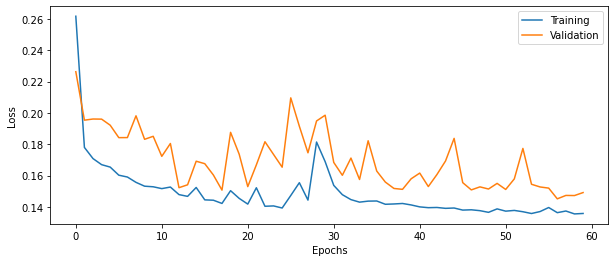

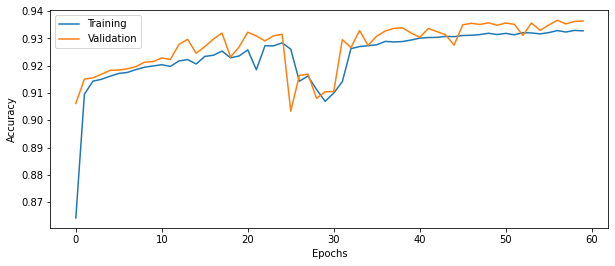

Total training time: 33.33 s
Mean epoch time: 0.55 s


In [25]:
# This should go to the top of the notebook probably
SEED = 123

# Sets Python, NumPy, and TensorFlow seeds in one call
keras.utils.set_random_seed(SEED)

# Forces GPU ops to be deterministic
tf.config.experimental.enable_op_determinism()

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.train_start = time.perf_counter()
        self.epoch_times = []

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start = time.perf_counter()

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_times.append(time.perf_counter() - self.epoch_start)

    def on_train_end(self, logs=None):
        self.train_time = time.perf_counter() - self.train_start

timing_cb = TimingCallback()


# Build and train model
best_model = build_DNN(
    input_shape=input_shape,
    n_hidden_layers=2,
    n_hidden_units=20,
    loss=loss,
    act_fun="relu",
    optimizer="adam",
    learning_rate=learning_rate,
    use_bn=False
)

best_history = best_model.fit(
    Xtrain, Ytrain,
    validation_data=(Xval, Yval),
    batch_size=batch_size,
    epochs=60,
    verbose=1,
    class_weight=class_weights,
    shuffle=False,
    callbacks=[timing_cb]
)
# Evaluate model on test data
best_score = best_model.evaluate(Xtest, Ytest, verbose=0)

# ============================================

print('Test loss: %.4f' % best_score[0])
print('Test accuracy: %.4f' % best_score[1])

# Plot the history from the training run
plot_results(best_history)

print(f"Total training time: {timing_cb.train_time:.2f} s")
print(f"Mean epoch time: {sum(timing_cb.epoch_times)/len(timing_cb.epoch_times):.2f} s")


#### **<span style="color:green">Increasing the number of layers</span>**
After increasing the number of layers to 10, we observe that the training breaks down after a few epochs, most likely due to exploding gradients. So we add batch normalization and that allows us to obtain decent test accuracy, although it seems to be lower than for 2 layers. The training time per epoch is increased by over 50%. 

Epoch 1/60
54/54 [==============================] - 4s 32ms/step - loss: 0.2311 - accuracy: 0.8992 - val_loss: 8.1991 - val_accuracy: 0.8548
Epoch 2/60
54/54 [==============================] - 1s 24ms/step - loss: 0.1701 - accuracy: 0.9130 - val_loss: 1.8163 - val_accuracy: 0.8801
Epoch 3/60
54/54 [==============================] - 1s 24ms/step - loss: 0.1674 - accuracy: 0.9148 - val_loss: 1.1460 - val_accuracy: 0.8733
Epoch 4/60
54/54 [==============================] - 1s 23ms/step - loss: 0.1661 - accuracy: 0.9157 - val_loss: 0.6150 - val_accuracy: 0.8942
Epoch 5/60
54/54 [==============================] - 1s 24ms/step - loss: 0.1825 - accuracy: 0.9057 - val_loss: 0.9882 - val_accuracy: 0.8745
Epoch 6/60
54/54 [==============================] - 1s 26ms/step - loss: 0.1769 - accuracy: 0.9088 - val_loss: 0.9216 - val_accuracy: 0.8914
Epoch 7/60
54/54 [==============================] - 1s 24ms/step - loss: 0.1792 - accuracy: 0.9072 - val_loss: 1.8691 - val_accuracy: 0.1764
Epoch 8/60
54

Epoch 59/60
54/54 [==============================] - 1s 23ms/step - loss: 0.1491 - accuracy: 0.9234 - val_loss: 1.0076 - val_accuracy: 0.9151
Epoch 60/60
54/54 [==============================] - 1s 24ms/step - loss: 0.1474 - accuracy: 0.9251 - val_loss: 0.4466 - val_accuracy: 0.9174
Test loss: 0.4564
Test accuracy: 0.9162


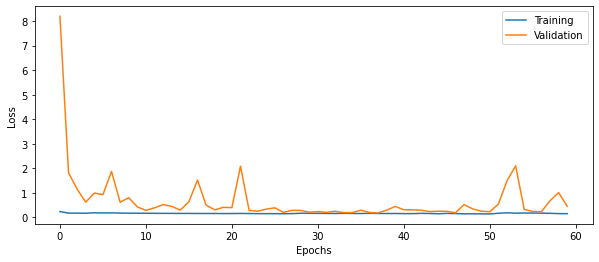

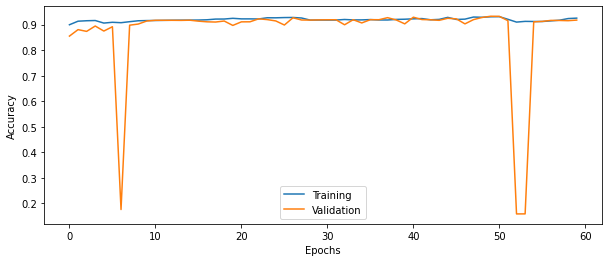

Total training time: 82.29 s
Mean epoch time: 1.37 s


In [26]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
best_model_deep = build_DNN(
    input_shape=input_shape,
    n_hidden_layers=10,
    n_hidden_units=20,
    loss=loss,
    act_fun="relu",
    optimizer="adam",
    learning_rate=learning_rate,
    use_bn=True
)

best_history_deep = best_model_deep.fit(
    Xtrain, Ytrain,
    validation_data=(Xval, Yval),
    batch_size=batch_size,
    epochs=60,
    verbose=1,
    class_weight=class_weights,
    shuffle=False,
    callbacks=[timing_cb]
)
# Evaluate model on test data
best_score_deep = best_model_deep.evaluate(Xtest, Ytest, verbose=0)

# ============================================

print('Test loss: %.4f' % best_score_deep[0])
print('Test accuracy: %.4f' % best_score_deep[1])

# Plot the history from the training run
plot_results(best_history_deep)

print(f"Total training time: {timing_cb.train_time:.2f} s")
print(f"Mean epoch time: {sum(timing_cb.epoch_times)/len(timing_cb.epoch_times):.2f} s")


### **3.2 Automatic hyper parameter search**
The number of hyper parameters that can be tried manually is limited and the process of trying out the different combinations and keeping track of them is time consuming and tedious. Today, there are several libraries available for automatic hyper parameter tuning (see an extensive list [here](https://github.com/balavenkatesh3322/hyperparameter_tuning)). The library that we will use in this lab is `Ray Tune` which can be integrated with many of the deep learning APIs available today (for the full description of the library capabilities see the [documentation](https://docs.ray.io/en/latest/tune/index.html)).


To use the `Ray Tune` functionality we need a function that defines the model training. This will then be used in a wrapper function that defines the hyper parameter search space, the resources available for running the search and the search algorithm. 

Start by implementing the `train_DNN` function in the `utilities.py` file (more detailed instructions are available in `utilities.py`). In the cell below, you can set up the search space and a `tune` ray object that takes the `train_DNN`. The tuner will set `train_DNN`, will select a set of hyper parameters and train several models for us (more information [here](https://docs.ray.io/en/latest/tune/key-concepts.html?_gl=1*j3ryje*_up*MQ..*_ga*NzQyMjIzNzg4LjE3MzY0MTk5MzY.*_ga_0LCWHW1N3S*MTczNjQxOTkzNS4xLjAuMTczNjQxOTkzNS4wLjAuMA..#tune-60-seconds)). 


`Ray Tune` library provides several types of hyper parameter search algorithms, including random and grid search, and Bayesian optimization. In this lab we will be using the default Ray Tune opitmization algorithm which is random serach. More infromation about the available search arlgorithms can be found [here](https://docs.ray.io/en/latest/tune/api/suggestion.html).

#### **<span style="color:red">Question</span>**
15. Run the automatic hyper parameter search with range of possible hyper parameter values as in your manual search. Does the automatic search set of parameters match those that you have found?
16. What are the benefits and drawbacks of automatic hyper parameter search?
   
#### **<span style="color:green">Answers</span>**
15. It does not but we did not do a very thorough manual search, knowing that we will be doing automatic search soon.
16. The main benefits are that many more combinations can be tried and that it is easier to keep track of parameters and results. The drawback is that it requires significant computing time and resources.

In [28]:
# import train_DNN
from utilities import train_DNN

# imports for hyperparameter tuning
from ray import tune, train, init
from ray.tune.schedulers import AsyncHyperBandScheduler

import os
import ray
ray.shutdown()


# --------------------------------------------  
# === Your code here =========================
# --------------------------------------------

# Define the hyper parameter, both those that should be searched and those that are fixed.
#  Hyperparameters to search are: act_fun, optimizer, use_bn, n_hidden_layers and n_hidden_units.
# The remaining parameters can be set to fixed values (This is to reduce the search space and time).
# Add the batch size and epochs so that the train_DNN can access them.
batch_size = 10000

hyperparameter_space =  {
    "act_fun": tune.choice(["relu", "tanh", "sigmoid"]),
    "optimizer": tune.choice(["sgd", "adam"]),
    "use_bn": tune.choice([True, False]),
    "n_hidden_layers": tune.randint(2, 11),      # samples {2,3,...,10}
    "n_hidden_units": tune.choice([32, 64, 128, 256]),

    "loss": "binary_crossentropy",
    "learning_rate": 1e-3,
    "use_dropout": False,
    "use_custom_dropout": False,
    "use_variational_layer": False,
    "input_shape": Xtrain.shape[1:],
}

# specify batch and number of epochs
training_config = {
            "data": (Xtrain, Ytrain, Xval, Yval),
            "epochs": 60,
            "batch_size": batch_size
        }

# specify the number of samples to take from the hyper parameter space and run. The larger the number, the longer the search time.
# Start small (e.g. 2) to test your implementation, then increase.
num_samples = 10

# ============================================

init(
    _temp_dir=r"C:\\ray", 
    runtime_env={"working_dir": os.getcwd(),
        "excludes": [
        "data/**",
        "*.csv",
        "*.parquet",
        "*.h5",
        "*.ckpt",
        "*.pth",
        "*.npy",
        "__pycache__/**",
        ".git/**"
    ]},
    ignore_reinit_error=True,
    object_store_memory=2 * 1024**3, # 4 GiB
)

# Definition of the Scheduler. This allows for several models to be trained/stopped/re-started simultaneously 
sched = AsyncHyperBandScheduler(
    metric="mean_accuracy", mode="max",
        time_attr="training_iteration", max_t=60, grace_period=20
    )

# Setting up the tuner.
tuner = tune.Tuner(
        tune.with_resources(tune.with_parameters(train_DNN, training_config=training_config), resources={"cpu": 12, "gpu":1}), # definition of which training function to use and the available resources. Consider adding "gpu":0 to resources if available.
        tune_config=tune.TuneConfig(
            scheduler=sched,
            num_samples=num_samples,
        ),
        run_config=train.RunConfig(
            name="DNN_hp_tuning",
            stop={"mean_accuracy": 1},
            storage_path=r'C:\\ray' # where to save the summary of the hyper parameter tuning.
        ),
        param_space=hyperparameter_space,
    )

# Run the hyper parameter search.
results = tuner.fit()

(train_DNN pid=25672) 2026-02-17 17:17:05.513258: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 196841360 exceeds 10% of free system memory.
(train_DNN pid=25672) 2026-02-17 17:17:13.811577: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 42180528 exceeds 10% of free system memory.
(train_DNN pid=25672) C:\arrow\cpp\src\arrow\filesystem\s3fs.cc:2598:  arrow::fs::FinalizeS3 was not called even though S3 was initialized.  This could lead to a segmentation fault at exit
(train_DNN pid=10864) 2026-02-17 17:18:04.170434: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 196841360 exceeds 10% of free system memory.
(train_DNN pid=10864) C:\arrow\cpp\src\arrow\filesystem\s3fs.cc:2598:  arrow::fs::FinalizeS3 was not called even though S3 was initialized.  This could lead to a segmentation fault at exit
(train_DNN pid=8276) 2026-02-17 17:19:14.882681: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 196841360 exceeds

In [29]:
# Show the best hyper parameter configuration that was found
best_trial = results.get_best_result(metric="mean_accuracy", mode='max')
print(f"Best trial config: {best_trial.config}")
print(f"Best trial final validation loss: {best_trial.metrics['keras_info']['val_loss']:0.4f}")
print(f"Best trial final validation accuracy: {best_trial.metrics['keras_info']['val_accuracy']:0.4f}")


Best trial config: {'act_fun': 'relu', 'optimizer': 'adam', 'use_bn': True, 'n_hidden_layers': 2, 'n_hidden_units': 256, 'loss': 'binary_crossentropy', 'learning_rate': 0.001, 'use_dropout': False, 'use_custom_dropout': False, 'use_variational_layer': False, 'input_shape': (92,)}
Best trial final validation loss: 0.1099
Best trial final validation accuracy: 0.9422


In [30]:
# import pickle

# best_config = best_trial.config

# with open("best_trial_config.pkl", "wb") as f:
#     pickle.dump(best_config, f, protocol=pickle.HIGHEST_PROTOCOL)

(train_DNN pid=14072) C:\arrow\cpp\src\arrow\filesystem\s3fs.cc:2598:  arrow::fs::FinalizeS3 was not called even though S3 was initialized.  This could lead to a segmentation fault at exit


# Part 4: Uncertainty quantification

In the next sections you will explore three methods for model uncertainty estimation:
- Monte Carlo dropout where we take advantage of the dropout layer during inference time.
- Cross validation where we train several models on different splits of data.
- Bayesian neural networks (BNN) where we modify our model definition to allow the model to learn distributions over weights and the output. 

**!Note**: through the next sections, use your best model configuration that you found through hyper parameter tuning (either manual or automatic).

### **4.1 Dropout uncertainty**

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this [paper](http://proceedings.mlr.press/v48/gal16.pdf)

To achieve this, we need to redefine the Keras Dropout. This was already done for you and it is available in `utilities.py` under `myDropout`. Adapt the `build_DNN` function to two boolean arguments, use_dropout and use_custom_dropout; add a standard Dropout layer if use_dropout is true, add a `myDropout` layer if use_custom_dropout is true.

Run the same test data through the trained network 100 times, with dropout turned on. 


In [31]:
# import pickle
# with open("best_trial_config.pkl", "rb") as f:
#      best_config = pickle.load(f)

In [32]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

from utilities import build_DNN
best_config = best_trial.config


# Your best training parameters
batch_size = 10000
epochs = 60
input_shape = best_config["input_shape"]
loss = best_config["loss"]
learning_rate = best_config["learning_rate"]

# Build and train model
model10 = build_DNN(
    input_shape=input_shape,
    n_hidden_layers=best_config["n_hidden_layers"],
    n_hidden_units=best_config["n_hidden_units"],
    loss=loss,
    act_fun=best_config["act_fun"],
    optimizer=best_config["optimizer"],
    learning_rate=learning_rate,
    use_bn=best_config["use_bn"],
    use_dropout=True,
    use_custom_dropout=True,
    use_variational_layer=best_config.get("use_variational_layer", False),
)

history10 = model10.fit(
    Xtrain, Ytrain,
    validation_data=(Xval, Yval),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    class_weight=class_weights,
    shuffle=False,
)


Epoch 1/60
54/54 [==============================] - 2s 21ms/step - loss: 0.3330 - accuracy: 0.8854 - val_loss: 0.2609 - val_accuracy: 0.9010
Epoch 2/60
54/54 [==============================] - 1s 16ms/step - loss: 0.2156 - accuracy: 0.9046 - val_loss: 0.2185 - val_accuracy: 0.9092
Epoch 3/60
54/54 [==============================] - 1s 17ms/step - loss: 0.1967 - accuracy: 0.9094 - val_loss: 0.2007 - val_accuracy: 0.9127
Epoch 4/60
54/54 [==============================] - 1s 16ms/step - loss: 0.1857 - accuracy: 0.9119 - val_loss: 0.1938 - val_accuracy: 0.9143
Epoch 5/60
54/54 [==============================] - 1s 16ms/step - loss: 0.1791 - accuracy: 0.9135 - val_loss: 0.1877 - val_accuracy: 0.9153
Epoch 6/60
54/54 [==============================] - 1s 16ms/step - loss: 0.1753 - accuracy: 0.9142 - val_loss: 0.1895 - val_accuracy: 0.9159
Epoch 7/60
54/54 [==============================] - 1s 16ms/step - loss: 0.1718 - accuracy: 0.9147 - val_loss: 0.1881 - val_accuracy: 0.9158
Epoch 8/60
54

Epoch 59/60
54/54 [==============================] - 1s 17ms/step - loss: 0.1304 - accuracy: 0.9331 - val_loss: 0.1662 - val_accuracy: 0.9343
Epoch 60/60
54/54 [==============================] - 1s 16ms/step - loss: 0.1292 - accuracy: 0.9331 - val_loss: 0.1651 - val_accuracy: 0.9346


In [33]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model10.evaluate(Xtest, Ytest, batch_size=8192, verbose=0)
                       
print('Test accuracy: %.4f' % score[1])

Test accuracy: 0.9335


In [34]:
# ============================================
# === Your code here =========================
# ============================================
n_runs = 100
accs = np.empty(n_runs, dtype=np.float32)

for i in range(n_runs):
    score = model10.evaluate(Xtest, Ytest, batch_size=8192, verbose=0)
    accs[i] = score[1] 

print(f"Test accuracy over {n_runs} runs: mean={accs.mean():.6f}, std={accs.std(ddof=1):.6f}")

# ============================================

Test accuracy over 100 runs: mean=0.933577, std=0.000136


### **4.2: Cross validation uncertainty**

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a [help function from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) to setup the CV. Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.


In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from utilities import build_DNN

random_state = 1234 
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

n_runs = n_splits
test_accuracies = np.empty(n_runs, dtype=np.float32)
batch_size = 10000
epochs = 60

for i, (train_idx, test_idx) in enumerate(skf.split(X, Y)):
    print(f"Running CV iteration {i}")

    Xtr, Xte = X[train_idx], X[test_idx]
    Ytr, Yte = Y[train_idx], Y[test_idx]

    # Class weights for this fold's training split only
    y_cw = Ytr
    if len(y_cw.shape) > 1 and y_cw.shape[1] > 1:
        y_cw = np.argmax(y_cw, axis=1)

    classes = np.unique(y_cw)
    weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_cw)
    class_weights = dict(zip(classes, weights))

    model10 = build_DNN(
        input_shape=best_config["input_shape"],
        n_hidden_layers=best_config["n_hidden_layers"],
        n_hidden_units=best_config["n_hidden_units"],
        loss=best_config["loss"],
        act_fun=best_config["act_fun"],
        optimizer=best_config["optimizer"],
        learning_rate=best_config["learning_rate"],
        use_bn=best_config["use_bn"],
        use_dropout=best_config["use_dropout"],
        use_variational_layer=best_config.get("use_variational_layer", False),
    )

    # No validation set (per requirement)
    history10 = model10.fit(
        Xtr, Ytr,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        class_weight=class_weights,
        shuffle=True,
    )

    # Evaluate on the held-out fold (NOT the global test set)
    score = model10.evaluate(Xte, Yte, batch_size=4096, verbose=0)
    test_accuracies[i] = score[1]

print(f"Test accuracy 10-fold CV: mean={test_accuracies.mean():.6f}, std={test_accuracies.std(ddof=1):.6f}")

# ============================================



Running CV iteration 0
Epoch 1/60
69/69 [==============================] - 2s 16ms/step - loss: 0.2313 - accuracy: 0.9021
Epoch 2/60
69/69 [==============================] - 1s 13ms/step - loss: 0.1660 - accuracy: 0.9163
Epoch 3/60
69/69 [==============================] - 1s 13ms/step - loss: 0.1601 - accuracy: 0.9175
Epoch 4/60
69/69 [==============================] - 1s 13ms/step - loss: 0.1556 - accuracy: 0.9182
Epoch 5/60
69/69 [==============================] - 1s 13ms/step - loss: 0.1532 - accuracy: 0.9184
Epoch 6/60
69/69 [==============================] - 1s 13ms/step - loss: 0.1486 - accuracy: 0.9193
Epoch 7/60
69/69 [==============================] - 1s 13ms/step - loss: 0.1453 - accuracy: 0.9210
Epoch 8/60
69/69 [==============================] - 1s 13ms/step - loss: 0.1429 - accuracy: 0.9234
Epoch 9/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1414 - accuracy: 0.9249
Epoch 10/60
69/69 [==============================] - 1s 13ms/step - loss: 0.1375 - acc

69/69 [==============================] - 1s 14ms/step - loss: 0.1195 - accuracy: 0.9373
Epoch 44/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1166 - accuracy: 0.9376
Epoch 45/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1164 - accuracy: 0.9379
Epoch 46/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1185 - accuracy: 0.9377
Epoch 47/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1165 - accuracy: 0.9381
Epoch 48/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1164 - accuracy: 0.9380
Epoch 49/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1192 - accuracy: 0.9375
Epoch 50/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1199 - accuracy: 0.9369
Epoch 51/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1161 - accuracy: 0.9380
Epoch 52/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1168 - accuracy: 0.9381
Epoch 53/60


Epoch 26/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1232 - accuracy: 0.9362
Epoch 27/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1205 - accuracy: 0.9365
Epoch 28/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1209 - accuracy: 0.9366
Epoch 29/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1208 - accuracy: 0.9366
Epoch 30/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1202 - accuracy: 0.9369
Epoch 31/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1197 - accuracy: 0.9368
Epoch 32/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1186 - accuracy: 0.9373
Epoch 33/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1188 - accuracy: 0.9374
Epoch 34/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1203 - accuracy: 0.9366
Epoch 35/60
69/69 [==============================] - 1s 15ms/step - loss: 0.1191 - accuracy: 0.9370


69/69 [==============================] - 1s 14ms/step - loss: 0.1423 - accuracy: 0.9245
Epoch 9/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1369 - accuracy: 0.9275
Epoch 10/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1372 - accuracy: 0.9286
Epoch 11/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1333 - accuracy: 0.9302
Epoch 12/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1335 - accuracy: 0.9303
Epoch 13/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1281 - accuracy: 0.9330
Epoch 14/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1288 - accuracy: 0.9329
Epoch 15/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1276 - accuracy: 0.9333
Epoch 16/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1265 - accuracy: 0.9342
Epoch 17/60
69/69 [==============================] - 1s 14ms/step - loss: 0.1245 - accuracy: 0.9348
Epoch 18/60
6

In [36]:
test_accuracies

array([0.93761617, 0.93840134, 0.9383097 , 0.9353129 , 0.93633366,
       0.93632054, 0.93887246, 0.9363197 , 0.9388717 , 0.9367909 ],
      dtype=float32)

In [37]:
model10.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 256)               23552     
                                                                 
 batch_normalization_32 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_32 (Activation)  (None, 256)               0         
                                                                 
 dense_75 (Dense)            (None, 256)               65536     
                                                                 
 batch_normalization_33 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_33 (Activation)  (None, 256)             

# **4.3 Bayesian neural networks (BNN)**

Instead of mimicking Bayesian inference through MC dropout (see more details in this [paper](https://proceedings.mlr.press/v48/gal16.html)), what if we could build a model that can inherently give us a way to probe both model uncertainty (i.e. [epistemic uncertainty](https://link.springer.com/article/10.1007/s10994-021-05946-3) cause by few training samples) and data uncertainty (i.e. [aleatoric uncertainty](https://link.springer.com/article/10.1007/s10994-021-05946-3))? 

One way to achieve this is to train models to learn distributions over weights in the layers and over the output. This can be achieved by using TenssorFlow probability (see the [documentation](https://www.tensorflow.org/probability) for an in-depth description of all the functionalities). In this example we will only scratch the surface of the capabilities that a probabilistic deep learning approach has to offer, by addressing only model uncertainty. 

To start with, think about a BNN as an extension of your classical DNN, where during training instead of learning a weights for each 'connection' in the network, we ask the model to lean a distribution. After model training, during inference time, we sample from the learned distributions to obtain the weights used in the model in the forward pass. The modifications that we have to implement in our `build_DNN` function are the following:
- Substitute the hidden `Dense` layers with [`DenseVariational`](https://www.tensorflow.org/probability/api_docs/python/tfp/layers/DenseVariational) layers (this can be found under tensorflow-probability.layers). Do not forget to specify the `kl_weight` as 1/ number of iterations per epoch ([reference](https://arxiv.org/abs/1505.05424)). 
- Define the prior weights distribution (`make_prior_fn` input in the `DenseVariational`): this is the distribution that we expect the weights to have prior having seen the data. In this example we will not train the prior distribution.
- Define the posterior weights distribution (`make_posterior_fn` input in the `DenseVariational`): this is the distribution that we expect the model to learn during training. Since we do not know at priory which is the posterior distribution, we let it be very general (i.e. multivariate Gaussian distribution) which parameters are learned by the model. 

You will find the `BNN_prior` and `BNN_posterior` defined for you in the `utilities.py` file. Update the `build_DNN` to accept a new boolean input `use_variational_layer` that when true substitutes the hidden `Dense` layers with the `DenseVariational` layers. 

**!NOTE** As you will see, training the BNN model is more computationally demanding and is more prone to over-fitting. Reduce the learning rate and increase the number of epochs to address this issue.

#### **<span style="color:red">Questions</span>**
17. (MC dropout) What is the mean and the standard deviation of the test accuracy after evaluating the model on 100 times?
18. (CV) What is the mean and the standard deviation of the test accuracy?
19. (CV) What is the main advantage of dropout compared to CV for estimating test uncertainty? The difference may not be so large in this notebook, but imagine that you have a network that takes 24 hours to train.
20. (BNN) Build the BNN model and look at the number of parameters. Is there a difference between the previous DNN and the BNN? Why is that?
21. (BNN) Without training the model, evaluate the model a twice on the validation set: do you obtain the same validation accuracy? Why
22. Think of at least one advantage and one disadvantage for each of the three uncertainty estimation methods.
    
    
#### **<span style="color:green">Answer</span>**
17. Test accuracy over 100 runs: mean=0.933457, std=0.000124
18. Test accuracy 10-fold CV: mean=0.933626, std=0.000477
19. CV is very time consuming as the model needs to be re-trained k times.
20. The BNN has twice as many parameters in our case. The BNN shows more parameters than the DNN because we’re no longer learning a single point value for each weight; we’re learning a distribution over each weight, and that distribution needs its own parameters
21. The validation results are not the same, because a Bayesian/variational model makes stochastic predictions: each forward pass samples weights from the learned (or initialized) posterior, so logits/probabilities (and thus predicted classes) can change between evaluations
22. MC Dropout: + Possible to approximate predictive uncertainty without changing the trained model - Non-deterministic outputs/metrics
Cross-validation: + Conceptually simple and fairly robust - Computationally expensive because it requires training K separate models
BNN: + Uncertainty is built into the model via distributions over weights/outputs, giving a principled framework for predictive uncertainty - More complex and heavier to train/tune than a standard DNN (extra variational parameters, KL terms, potential stability issues) 

In [41]:
# Code to answer Q21
N_train = Xtrain.shape[0]
model12 = build_DNN(
    input_shape=best_config["input_shape"],
    n_hidden_layers=best_config["n_hidden_layers"],
    n_hidden_units=best_config["n_hidden_units"],
    loss=best_config["loss"],
    act_fun=best_config["act_fun"],
    optimizer=best_config["optimizer"],
    learning_rate=best_config["learning_rate"],
    use_bn=best_config["use_bn"],
    use_dropout=best_config["use_dropout"],
    use_variational_layer=True,
    kl_weight = 1.0 / N_train
)
n_runs = 2
accs = np.empty(n_runs, dtype=np.float32)

for i in range(n_runs):
    score = model12.evaluate(Xval, Yval, batch_size=8192, verbose=0)
    accs[i] = score[1] 

print(accs)

[0.45185438 0.5210389 ]


In [42]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Your best training parameters
batch_size = 10000
epochs = 300
N_train = Xtrain.shape[0]

# Build and train model
model11 = build_DNN(
    input_shape=best_config["input_shape"],
    n_hidden_layers=best_config["n_hidden_layers"],
    n_hidden_units=best_config["n_hidden_units"],
    loss=best_config["loss"],
    act_fun=best_config["act_fun"],
    optimizer=best_config["optimizer"],
    learning_rate=best_config["learning_rate"],
    use_bn=best_config["use_bn"],
    use_dropout=best_config["use_dropout"],
    use_variational_layer=True,
    kl_weight = 1.0 / N_train
)

history11 = model11.fit(
    Xtrain, Ytrain,
    validation_data=(Xval, Yval),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    class_weight=class_weights,
    shuffle=False,
)
# ============================================

Epoch 1/300
54/54 [==============================] - 3s 27ms/step - loss: 0.6851 - accuracy: 0.5931 - val_loss: 1.9806 - val_accuracy: 0.1779
Epoch 2/300
54/54 [==============================] - 1s 16ms/step - loss: 0.5787 - accuracy: 0.8535 - val_loss: 1.1904 - val_accuracy: 0.5119
Epoch 3/300
54/54 [==============================] - 1s 16ms/step - loss: 0.5251 - accuracy: 0.8617 - val_loss: 0.8302 - val_accuracy: 0.8589
Epoch 4/300
54/54 [==============================] - 1s 16ms/step - loss: 0.4837 - accuracy: 0.8654 - val_loss: 0.7213 - val_accuracy: 0.8650
Epoch 5/300
54/54 [==============================] - 1s 16ms/step - loss: 0.4369 - accuracy: 0.8714 - val_loss: 0.6324 - val_accuracy: 0.8683
Epoch 6/300
54/54 [==============================] - 1s 15ms/step - loss: 0.3898 - accuracy: 0.8754 - val_loss: 0.5095 - val_accuracy: 0.8746
Epoch 7/300
54/54 [==============================] - 1s 15ms/step - loss: 0.3503 - accuracy: 0.8784 - val_loss: 0.4439 - val_accuracy: 0.8798
Epoch 

54/54 [==============================] - 1s 16ms/step - loss: 0.1831 - accuracy: 0.9142 - val_loss: 0.2264 - val_accuracy: 0.9160
Epoch 116/300
54/54 [==============================] - 1s 15ms/step - loss: 0.1824 - accuracy: 0.9143 - val_loss: 0.2169 - val_accuracy: 0.9158
Epoch 117/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1821 - accuracy: 0.9144 - val_loss: 0.2209 - val_accuracy: 0.9157
Epoch 118/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1821 - accuracy: 0.9142 - val_loss: 0.2163 - val_accuracy: 0.9164
Epoch 119/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1819 - accuracy: 0.9145 - val_loss: 0.2248 - val_accuracy: 0.9156
Epoch 120/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1818 - accuracy: 0.9142 - val_loss: 0.2250 - val_accuracy: 0.9156
Epoch 121/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1819 - accuracy: 0.9143 - val_loss: 0.2113 - val_accuracy: 0.9159
Epoch 

Epoch 172/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1740 - accuracy: 0.9155 - val_loss: 0.2155 - val_accuracy: 0.9166
Epoch 173/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1742 - accuracy: 0.9154 - val_loss: 0.2194 - val_accuracy: 0.9165
Epoch 174/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1737 - accuracy: 0.9153 - val_loss: 0.2109 - val_accuracy: 0.9170
Epoch 175/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1733 - accuracy: 0.9155 - val_loss: 0.2063 - val_accuracy: 0.9167
Epoch 176/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1735 - accuracy: 0.9155 - val_loss: 0.2088 - val_accuracy: 0.9171
Epoch 177/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1735 - accuracy: 0.9153 - val_loss: 0.2110 - val_accuracy: 0.9165
Epoch 178/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1735 - accuracy: 0.9153 - val_loss: 0.2090 - val_accuracy:

Epoch 229/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1701 - accuracy: 0.9158 - val_loss: 0.2094 - val_accuracy: 0.9175
Epoch 230/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1702 - accuracy: 0.9157 - val_loss: 0.2044 - val_accuracy: 0.9173
Epoch 231/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1705 - accuracy: 0.9158 - val_loss: 0.2108 - val_accuracy: 0.9172
Epoch 232/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1700 - accuracy: 0.9159 - val_loss: 0.2047 - val_accuracy: 0.9175
Epoch 233/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1702 - accuracy: 0.9157 - val_loss: 0.2024 - val_accuracy: 0.9177
Epoch 234/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1700 - accuracy: 0.9159 - val_loss: 0.2110 - val_accuracy: 0.9173
Epoch 235/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1703 - accuracy: 0.9159 - val_loss: 0.2070 - val_accuracy:

Epoch 286/300
54/54 [==============================] - 1s 16ms/step - loss: 0.1687 - accuracy: 0.9164 - val_loss: 0.2124 - val_accuracy: 0.9174
Epoch 287/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1692 - accuracy: 0.9161 - val_loss: 0.2073 - val_accuracy: 0.9173
Epoch 288/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1690 - accuracy: 0.9163 - val_loss: 0.2029 - val_accuracy: 0.9181
Epoch 289/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1688 - accuracy: 0.9161 - val_loss: 0.2090 - val_accuracy: 0.9175
Epoch 290/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1685 - accuracy: 0.9163 - val_loss: 0.2067 - val_accuracy: 0.9171
Epoch 291/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1684 - accuracy: 0.9163 - val_loss: 0.1963 - val_accuracy: 0.9182
Epoch 292/300
54/54 [==============================] - 1s 17ms/step - loss: 0.1684 - accuracy: 0.9163 - val_loss: 0.1967 - val_accuracy:

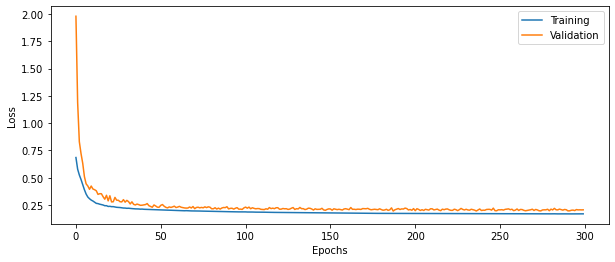

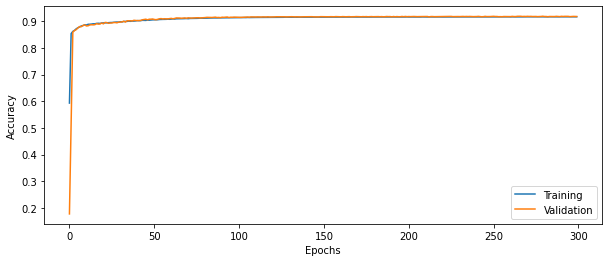

In [43]:
# Plot the history from the training run
from utilities import plot_results
plot_results(history11) 

As we have done for the MC dropout uncertainty estimation, run the evaluation on the test set 100 times and show the mean and standard deviation.

In [44]:
# ============================================
# === Your code here =========================
# ============================================
# Run the testing 100 times, and save the accuracies in an array

n_runs = 100
accs = np.empty(n_runs, dtype=np.float32)

for i in range(n_runs):
    score = model11.evaluate(Xtest, Ytest, batch_size=8192, verbose=0)
    accs[i] = score[1] 

print(f"Test accuracy over {n_runs} runs: mean={accs.mean():.6f}, std={accs.std(ddof=1):.6f}")
# ============================================

Test accuracy over 100 runs: mean=0.916698, std=0.000386


In [45]:
model11.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_variational_2 (DenseV  (None, 256)              47104     
 ariational)                                                     
                                                                 
 batch_normalization_36 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 256)               0         
                                                                 
 dense_variational_3 (DenseV  (None, 256)              131072    
 ariational)                                                     
                                                                 
 batch_normalization_37 (Bat  (None, 256)              1024      
 chNormalization)                                    

# Part 5: DNN for regression

A similar DNN can be used for regression, instead of classification.

#### **<span style="color:red">Questions</span>**
23. How would you change the DNN used in this lab in order to use it for regression instead?

#### **<span style="color:green">Answer</span>**
We'd need to change the output layer, the loss, and the metrics. For regression we want a linear output (no sigmoid), because the target is continuous and not restricted to [0,1]. Classification loss (binary_crossentropy) is to be replaced with a regression loss such as mean squared error (MSE). Accuracy is not meaningful for regression, so we use MSE or similar as the performance metric.

## Report

Send in this jupyter notebook, with answers to all questions.

# **<span style="color:green">(Optional) Comparison with tree-based methods</span>**

Benchmarks on tabular datasets often find boosted trees outperform standard MLP-style networks because trees handle irregular decision rules and noisy / uninformative features more naturally. Boosted trees can ignore unhelpful features via split selection, whereas an MLP mixes all features and can be more sensitive without careful regularization.

We get suspiciously good results using tree-based methods compared to DNN but we're not jumping to conclusions as we did not have time to optimize DNN performance due to a very large number of tasks and the amount of time required to train multiple DNN models. But on the surface, the performance of tree-based data on tabular data appears to be very much competitive with DNN.

In [46]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, balanced_accuracy_score
from sklearn.utils.class_weight import compute_class_weight

classes = np.array([0, 1])
w0, w1 = compute_class_weight(class_weight="balanced", classes=classes, y=Ytrain)
class_weight = {0: float(w0), 1: float(w1)}
sample_weight = np.where(Ytrain == 0, class_weight[0], class_weight[1]).astype(np.float32)

evals_result = {}

clf = lgb.LGBMClassifier(
    objective="binary",
    device_type="gpu",
    n_estimators=5000,
    learning_rate=0.05,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    n_jobs=-1,
)

clf.fit(
    Xtrain, Ytrain,
    sample_weight=sample_weight,
    eval_set=[(Xtrain, Ytrain), (Xval, Yval)],
    eval_metric=["auc", "binary_logloss"],
    callbacks=[
        lgb.early_stopping(stopping_rounds=100, verbose=True),
        lgb.log_evaluation(period=50), 
        lgb.record_evaluation(evals_result),
    ],
)

p = clf.predict_proba(Xtest, num_iteration=clf.best_iteration_)[:, 1]

print("ROC AUC:", roc_auc_score(Ytest, p))
print("Acc@0.5:", accuracy_score(Ytest, (p >= 0.5).astype(int)))
print("Balanced Acc@0.5:", balanced_accuracy_score(Ytest, (p >= 0.5).astype(int)))

[LightGBM] [Info] Number of positive: 449760, number of negative: 85135
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22673
[LightGBM] [Info] Number of data points in the train set: 534895, number of used features: 92
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1660 Ti with Max-Q Design, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 74 dense feature groups (38.77 MB) transferred to GPU in 0.057927 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[50]	training's auc: 0.999994	training's binary_logloss: 0.0472231	valid_1's auc: 0.999991	valid_1's binary_logloss: 0.047584
[100]	training's auc: 0.999999	training's binary_loglos

The below is a sanity check to confirm that we don't have data leakage, the accuracy drops to baseline of 84% as expected

In [47]:
# Shuffled-label test
rng = np.random.default_rng(0)
Ytrain_shuf = rng.permutation(Ytrain)

clf_shuf = lgb.LGBMClassifier(
    objective="binary",
    device_type="gpu",
    n_estimators=5000,
    learning_rate=0.05,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    n_jobs=-1,
)

clf_shuf.fit(
    Xtrain, Ytrain_shuf,
    eval_set=[(Xval, Yval)],         # keep val labels real
    eval_metric="auc",
    callbacks=[lgb.early_stopping(100, verbose=False)],
)

p_shuf = clf_shuf.predict_proba(Xtest, num_iteration=clf_shuf.best_iteration_)[:, 1]
print("SHUF  AUC:", roc_auc_score(Ytest, p_shuf))
print("SHUF  Acc:", accuracy_score(Ytest, (p_shuf >= 0.5).astype(int)))

[LightGBM] [Info] Number of positive: 449760, number of negative: 85135
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22673
[LightGBM] [Info] Number of data points in the train set: 534895, number of used features: 92
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1660 Ti with Max-Q Design, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 74 dense feature groups (38.77 MB) transferred to GPU in 0.058873 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.840838 -> initscore=1.664476
[LightGBM] [Info] Start training from score 1.664476
SHUF  AUC: 0.67998860997139
SHUF  Acc: 0.8408406836443584


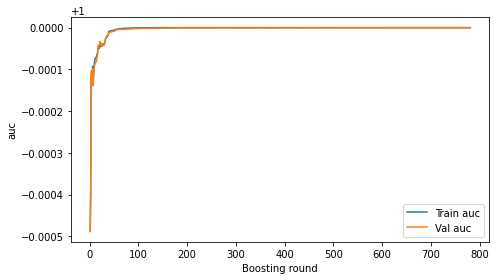

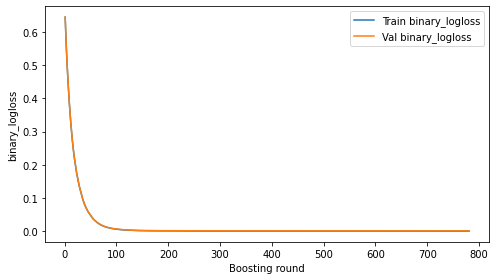

In [48]:
import matplotlib.pyplot as plt

def plot_lgb_learning_curves(evals_result, metric):
    train_key = "training"
    valid_key = "valid_1"

    y_train = evals_result[train_key][metric]
    y_valid = evals_result[valid_key][metric]
    x = range(1, len(y_train) + 1)

    plt.figure(figsize=(7, 4))
    plt.plot(x, y_train, label=f"Train {metric}")
    plt.plot(x, y_valid, label=f"Val {metric}")
    plt.xlabel("Boosting round")
    plt.ylabel(metric)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_lgb_learning_curves(evals_result, "auc")
plot_lgb_learning_curves(evals_result, "binary_logloss")

In [49]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

w_train = np.where(Ytrain == 0, class_weights[0], class_weights[1]).astype(np.float32)
w_val   = np.where(Yval   == 0, class_weights[0], class_weights[1]).astype(np.float32)

clf = XGBClassifier(
    objective="binary:logistic",
    device="cuda",
    n_estimators=5000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    tree_method="hist",
    n_jobs=-1,
    random_state=1234,
    eval_metric="logloss",
    early_stopping_rounds=100,
)

clf.fit(
    Xtrain, Ytrain,
    sample_weight=w_train,
    eval_set=[(Xtrain, Ytrain), (Xval, Yval)],
    sample_weight_eval_set=[w_train, w_val],  # weight the eval metrics too
    verbose=50
)

p = clf.predict_proba(Xtest)[:, 1]
print("AUC:", roc_auc_score(Ytest, p))
print("Acc:", accuracy_score(Ytest, (p >= 0.5).astype(int)))

[0]	validation_0-logloss:0.65137	validation_1-logloss:0.65138
[50]	validation_0-logloss:0.11463	validation_1-logloss:0.11451
[100]	validation_0-logloss:0.07752	validation_1-logloss:0.07784
[150]	validation_0-logloss:0.07098	validation_1-logloss:0.07163
[200]	validation_0-logloss:0.06620	validation_1-logloss:0.06730
[250]	validation_0-logloss:0.06227	validation_1-logloss:0.06397
[300]	validation_0-logloss:0.05918	validation_1-logloss:0.06144
[350]	validation_0-logloss:0.05690	validation_1-logloss:0.05970
[400]	validation_0-logloss:0.05492	validation_1-logloss:0.05823
[450]	validation_0-logloss:0.05289	validation_1-logloss:0.05672
[500]	validation_0-logloss:0.05128	validation_1-logloss:0.05558
[550]	validation_0-logloss:0.04959	validation_1-logloss:0.05443
[600]	validation_0-logloss:0.04813	validation_1-logloss:0.05351
[650]	validation_0-logloss:0.04683	validation_1-logloss:0.05269
[700]	validation_0-logloss:0.04551	validation_1-logloss:0.05188
[750]	validation_0-logloss:0.04418	validati

C:\Users\svolc\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [17:46:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


AUC: 0.9989414314361814
Acc: 0.9831444499699008


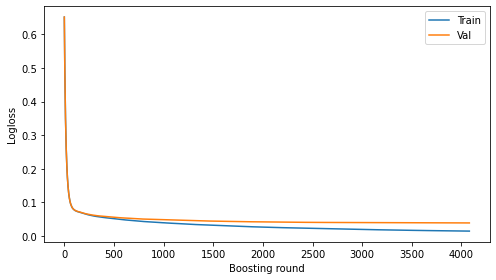

In [50]:
import matplotlib.pyplot as plt
results = clf.evals_result()
train_logloss = results["validation_0"]["logloss"]
val_logloss   = results["validation_1"]["logloss"]

plt.figure(figsize=(7, 4))
plt.plot(train_logloss, label="Train")
plt.plot(val_logloss, label="Val")
plt.xlabel("Boosting round")
plt.ylabel("Logloss")
plt.legend()
plt.tight_layout()
plt.show()